# REGENERATION
# TEAM 3

## Exploratory Data Analysis

## Preparations

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import collections
from scipy import stats
from difflib import SequenceMatcher

In [2]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 

In [3]:
#Please keep this xlsx file on the same folder as this notebook
df = pd.read_excel("mpg.data.xlsx")

## Basic data set Exploration

In [4]:
# First five rows
df.head()

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,origin,car name,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,NaN,NaN,NaN,NaN
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,NaN,NaN,NaN,NaN
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,NaN,NaN,NaN,NaN
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,NaN,NaN,NaN,NaN
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,NaN,NaN,NaN,NaN


In [5]:
df.iloc[:,12].unique()

array([nan, '  '], dtype=object)

In [6]:
#We delete the 4 last columns as they are useless
df.drop(df.iloc[:, 9:13], inplace = True, axis = 1)

In [7]:
# Checking
df.tail()

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,origin,car name
401,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
402,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
403,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
404,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger
405,31.0,4,119.0,82.0,2720,19.4,82,1,chevy s-10


In [8]:
# Random five rows
df.sample(5)

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,origin,car name
310,31.8,4,85.0,65.0,2020,19.2,79,3,datsun 210
304,25.4,5,183.0,77.0,3530,20.1,79,2,mercedes benz 300d
49,12.0,8,383.0,180.0,4955,11.5,71,1,dodge monaco (sw)
224,30.0,4,111.0,80.0,2155,14.8,77,1,buick opel isuzu deluxe
302,35.7,4,98.0,80.0,1915,14.4,79,1,dodge colt hatchback custom


In [9]:
# Dimensions of dataframe
df.shape

(406, 9)

In [10]:
#type of values in each column.categorical (object) and numeric (float and int)
df.dtypes

mpg             float64
cylinders         int64
displayments    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [11]:
# Origin from numerical to categorical
df['origin'] = df['origin'].astype('str')

In [12]:
df.dtypes

mpg             float64
cylinders         int64
displayments    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin           object
car name         object
dtype: object

In [13]:
# metadata
df.columns

Index(['mpg', 'cylinders', 'displayments', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [14]:
#Quantity of unique values in eac column
df.nunique()

mpg             129
cylinders         5
displayments     83
horsepower       93
weight          356
acceleration     96
model year       13
origin            3
car name        312
dtype: int64

In [15]:
# Count of the unique values of cylinders attribute
df['cylinders'].value_counts()
# Very few entries of 3 and 5 cylinders

4    207
8    108
6     84
3      4
5      3
Name: cylinders, dtype: int64

In [16]:
# Total null values in each column.
df.isnull().sum()

mpg             8
cylinders       0
displayments    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

## Numeric Features

<AxesSubplot:xlabel='cylinders', ylabel='count'>

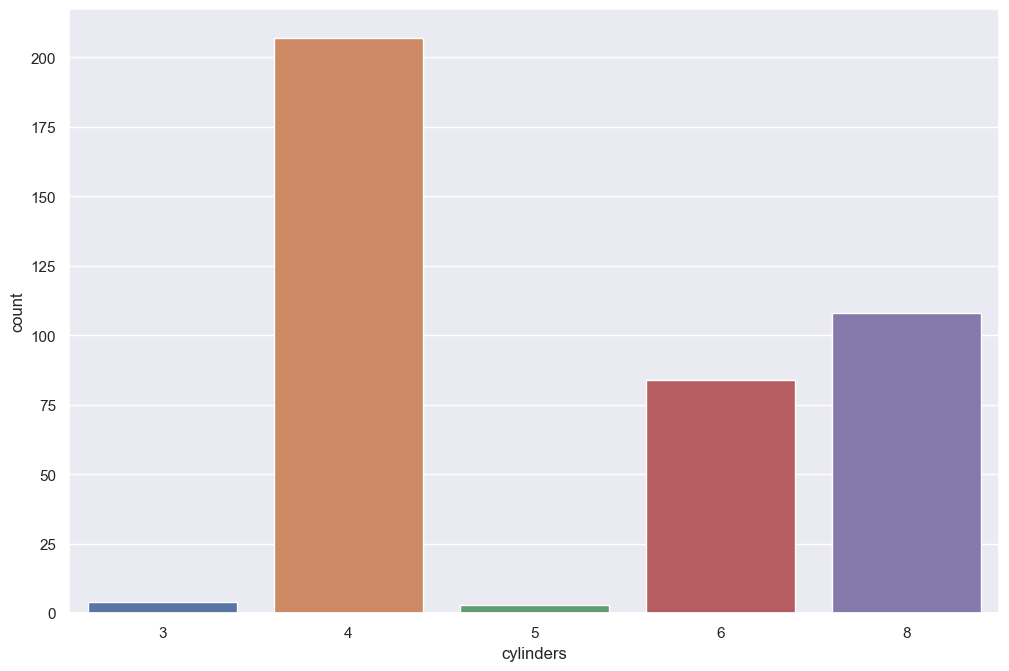

In [38]:
#Plot discrete attributes
sns.set_theme(style="darkgrid")


sns.countplot(x="cylinders", data=df)

<AxesSubplot:xlabel='model year', ylabel='count'>

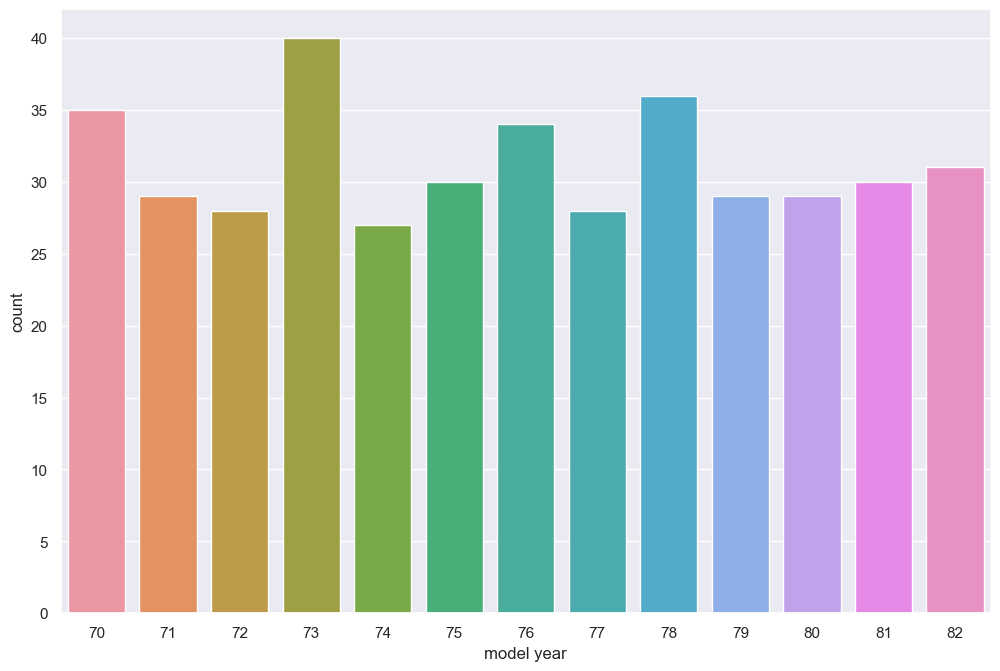

In [39]:
sns.countplot(x="model year", data=df)


<AxesSubplot:xlabel='origin', ylabel='count'>

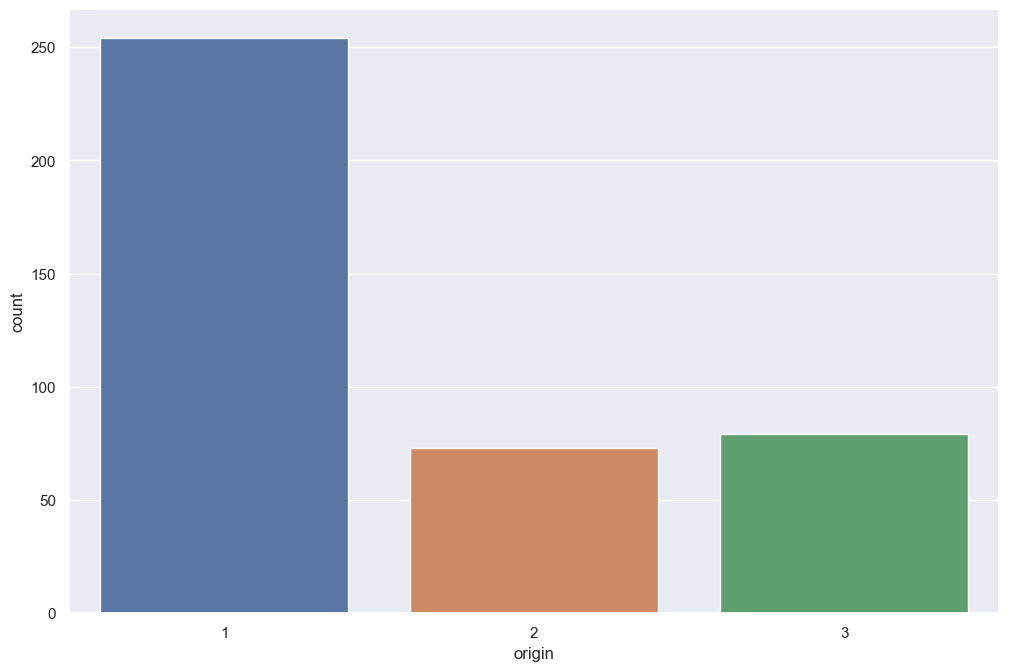

In [40]:
sns.countplot(x="origin", data=df)
#Cars designed in origin 1 are more than half!

In [18]:
df.groupby(['model year']).mean()

#Changes on mpg are observed through the years. We also see change on most of the attributes throught the years though.
# Probably other attributes are responsible for the rise of mpg. We will come back to that.


,mpg,cylinders,displayments,horsepower,weight,acceleration
model year,,,,,,
70,17.689655,6.857143,286.857143,148.857143,3441.314286,12.714286
71,21.250000,5.517241,205.862069,104.928571,2960.344828,15.310345
72,18.714286,5.821429,218.375000,120.178571,3237.714286,15.125000
73,17.100000,6.375000,256.875000,130.475000,3419.025000,14.312500
74,22.703704,5.259259,171.740741,94.230769,2877.925926,16.203704
75,20.266667,5.600000,205.533333,101.066667,3176.800000,16.050000
76,21.573529,5.647059,197.794118,101.117647,3078.735294,15.941176
77,23.375000,5.464286,191.392857,105.071429,2997.357143,15.435714
78,24.061111,5.361111,177.805556,99.694444,2861.805556,15.805556


c:\users\ezet\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\ezet\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\ezet\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

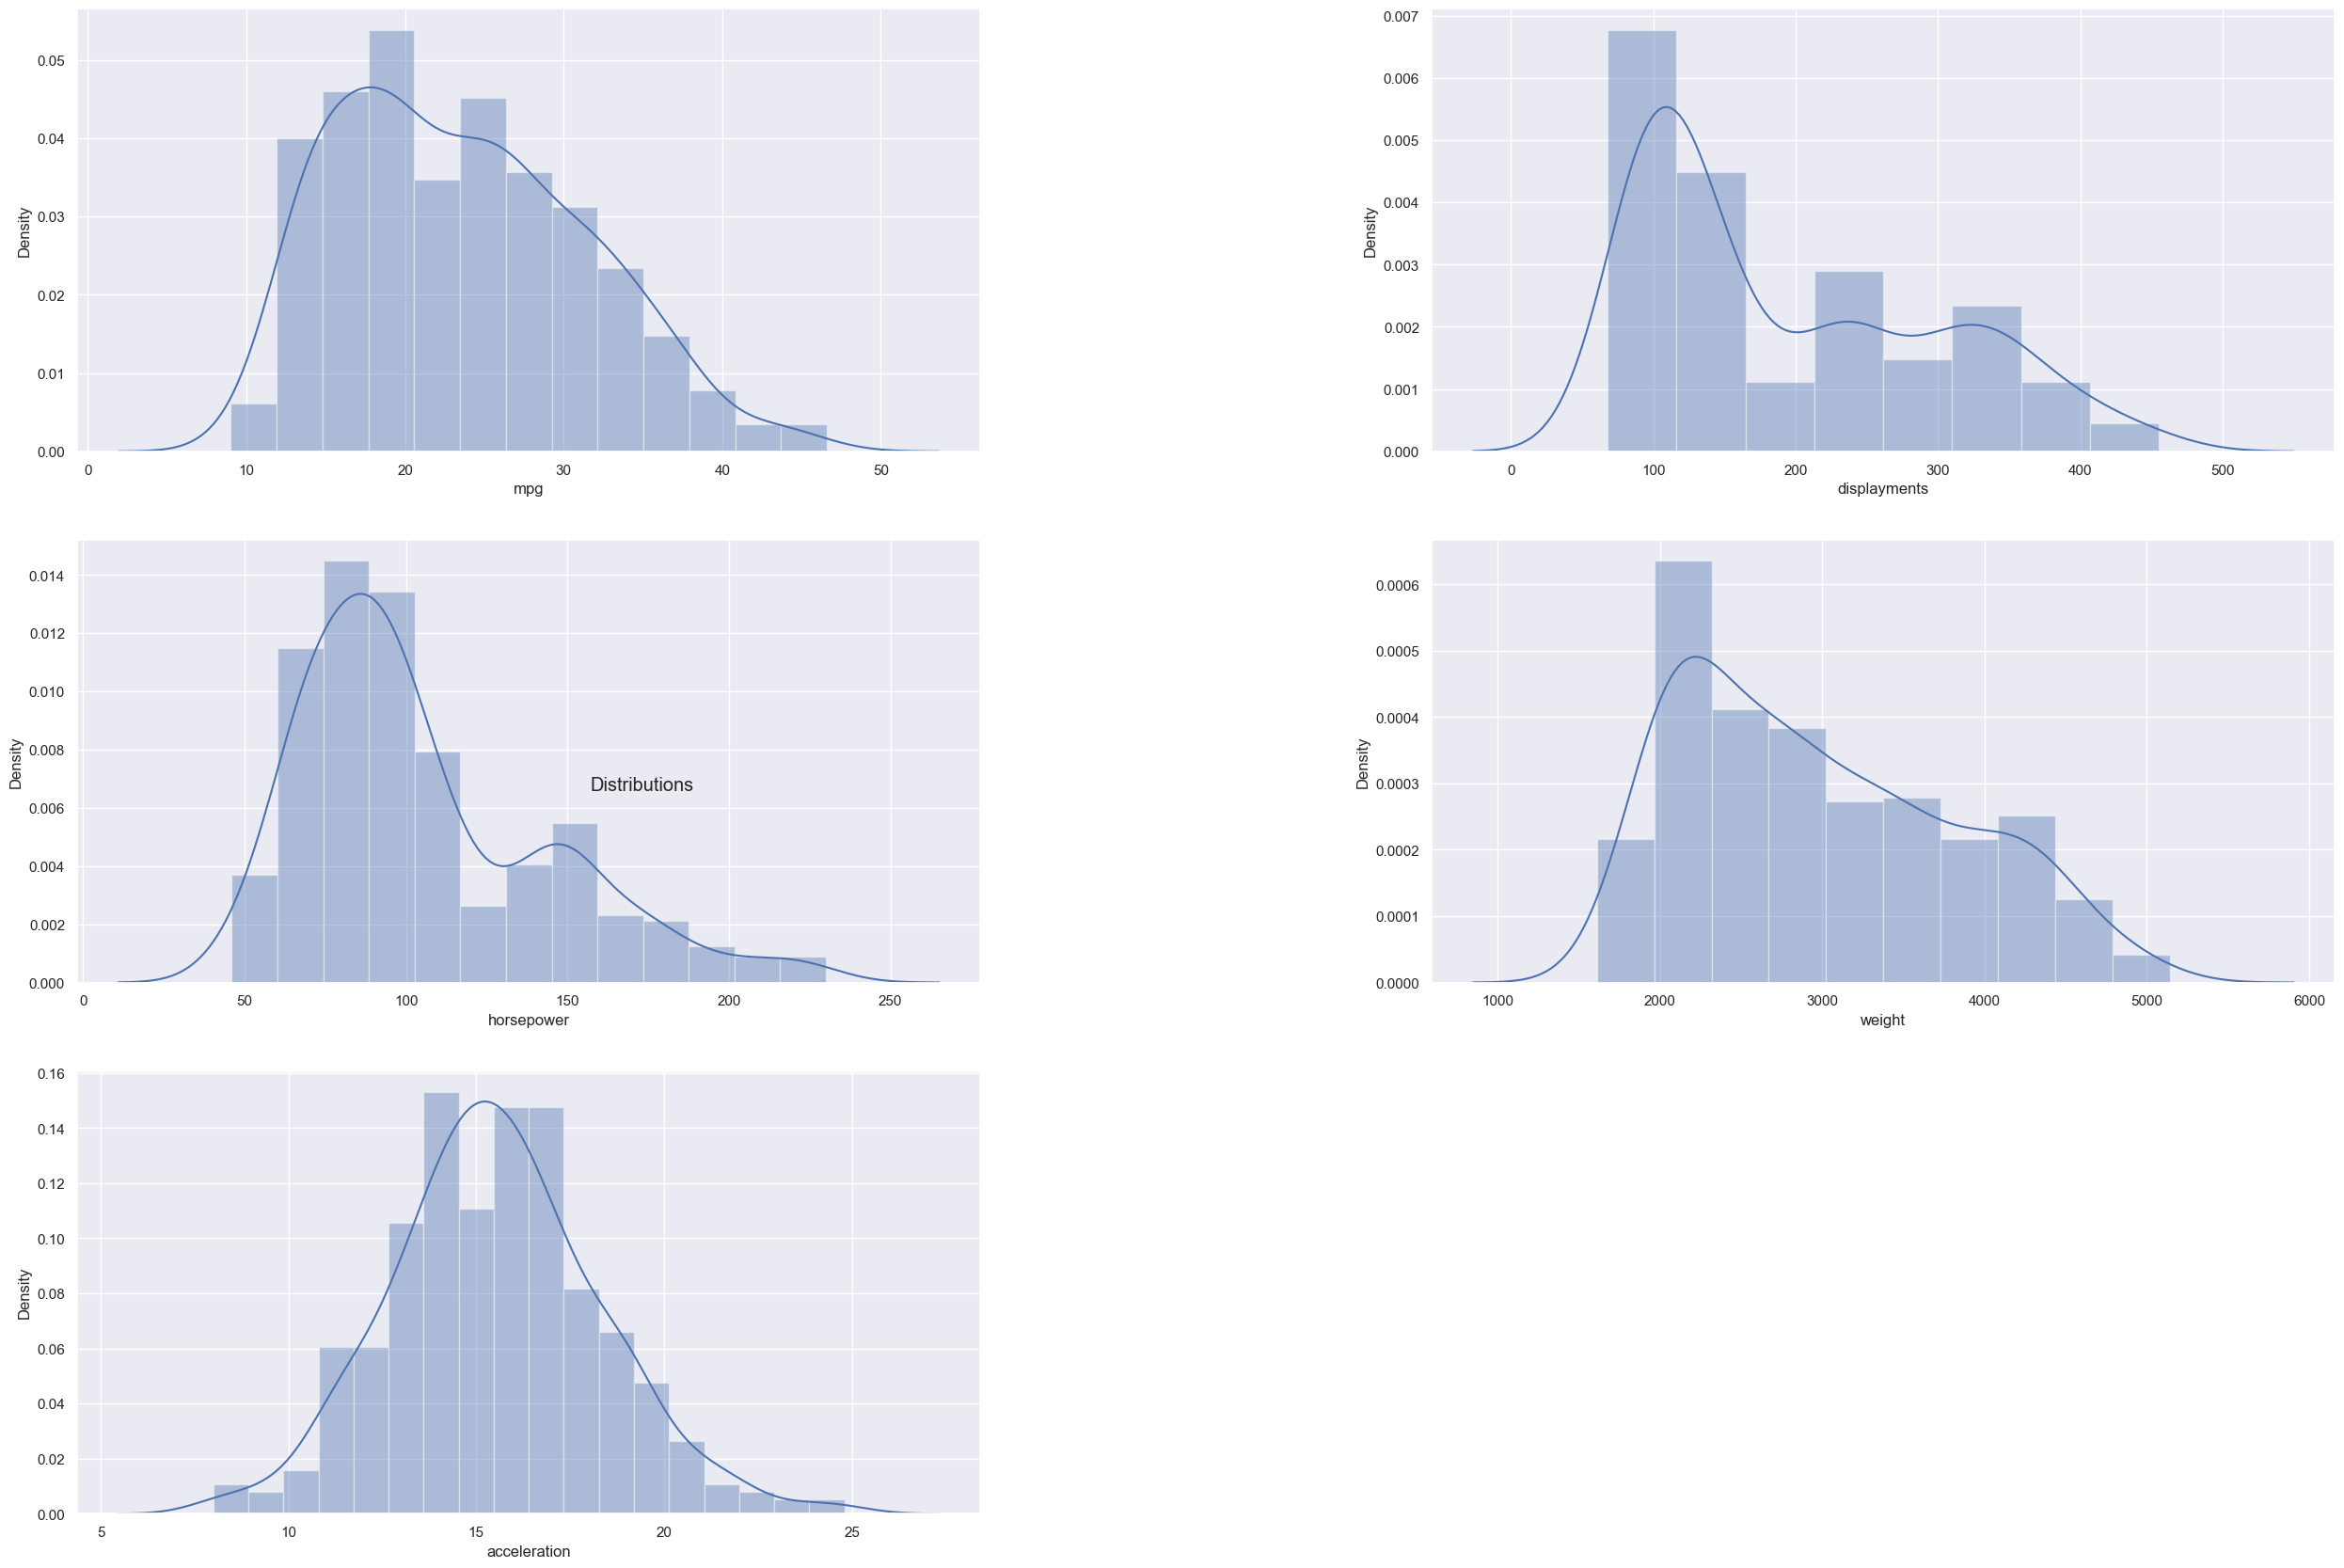

<Figure size 10000x10000 with 0 Axes>

In [41]:
#Subplots  distplots of continuous attributes
inspectKeys = ['mpg', 'displayments', 'horsepower', 'weight', 'acceleration']

fig, axes = plt.subplots(nrows=3,ncols=2)
fig.suptitle('Distributions')
for (index, fieldName) in enumerate(inspectKeys):
    row = index // 2
    col = index % 2
    axis = axes[row,col]
    sns.distplot(df[fieldName], ax=axis)
fig.delaxes(axes[2][1])

fig.subplots_adjust(left=0, bottom=0, right=2, top=2, wspace=0.5, hspace=0.2)
plt.figure(figsize=(100,100))
plt.show()

In [42]:
df.describe()

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359,3.748737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000,73.000000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


## Categorical features

In [43]:
df.describe(include='object')

,origin,car name
count,406,406
unique,3,312
top,1,ford pinto
freq,254,6


In [45]:
df[df['car name'] == 'ford pinto']
# Why six same named cars have the diferrent attributes?
# Different model year.

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,origin,car name
38,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
119,19.0,4,122.0,85.0,2310,18.5,73,1,ford pinto
137,26.0,4,122.0,80.0,2451,16.5,74,1,ford pinto
175,23.0,4,140.0,83.0,2639,17.0,75,1,ford pinto
181,18.0,6,171.0,97.0,2984,14.5,75,1,ford pinto
213,26.5,4,140.0,72.0,2565,13.6,76,1,ford pinto


## Grouping and segmentation 

In [47]:
pd.pivot_table(df, index='origin', columns='cylinders', values='mpg')


cylinders,3,4,5,6,8
origin,,,,,
1,NaN,27.840278,NaN,19.663514,14.963107
2,NaN,28.411111,27.366667,20.100000,NaN
3,20.55,31.595652,NaN,23.883333,NaN


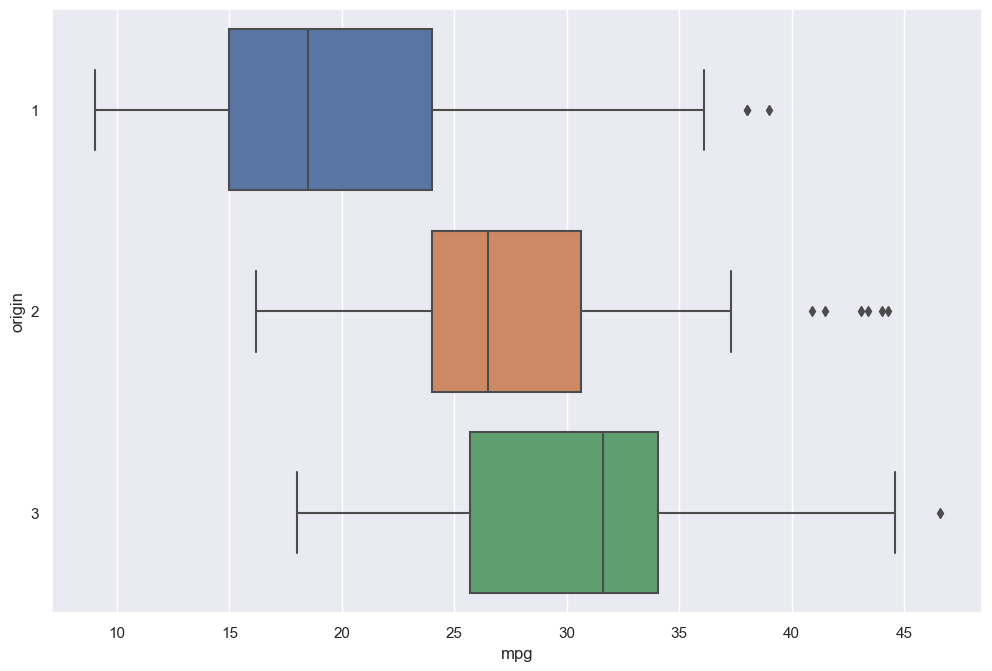

In [48]:
#Boxplots to see the mpg's distribution for each origin
for column in df.select_dtypes(include='object'):
    if df[column].nunique() < 10:
        sns.boxplot(y=column, x='mpg', data=df)
plt.show()

In [49]:
for column in df.select_dtypes(include='object'):
    if df[column].nunique() < 10:
        display(df.groupby(column).mean())

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year
origin,,,,,,,
1,20.083534,6.283465,247.935039,119.900000,3372.700787,14.942520,75.500000
2,27.891429,4.150685,109.465753,81.000000,2431.493151,16.821918,75.739726
3,30.450633,4.101266,102.708861,79.835443,2221.227848,16.172152,77.443038


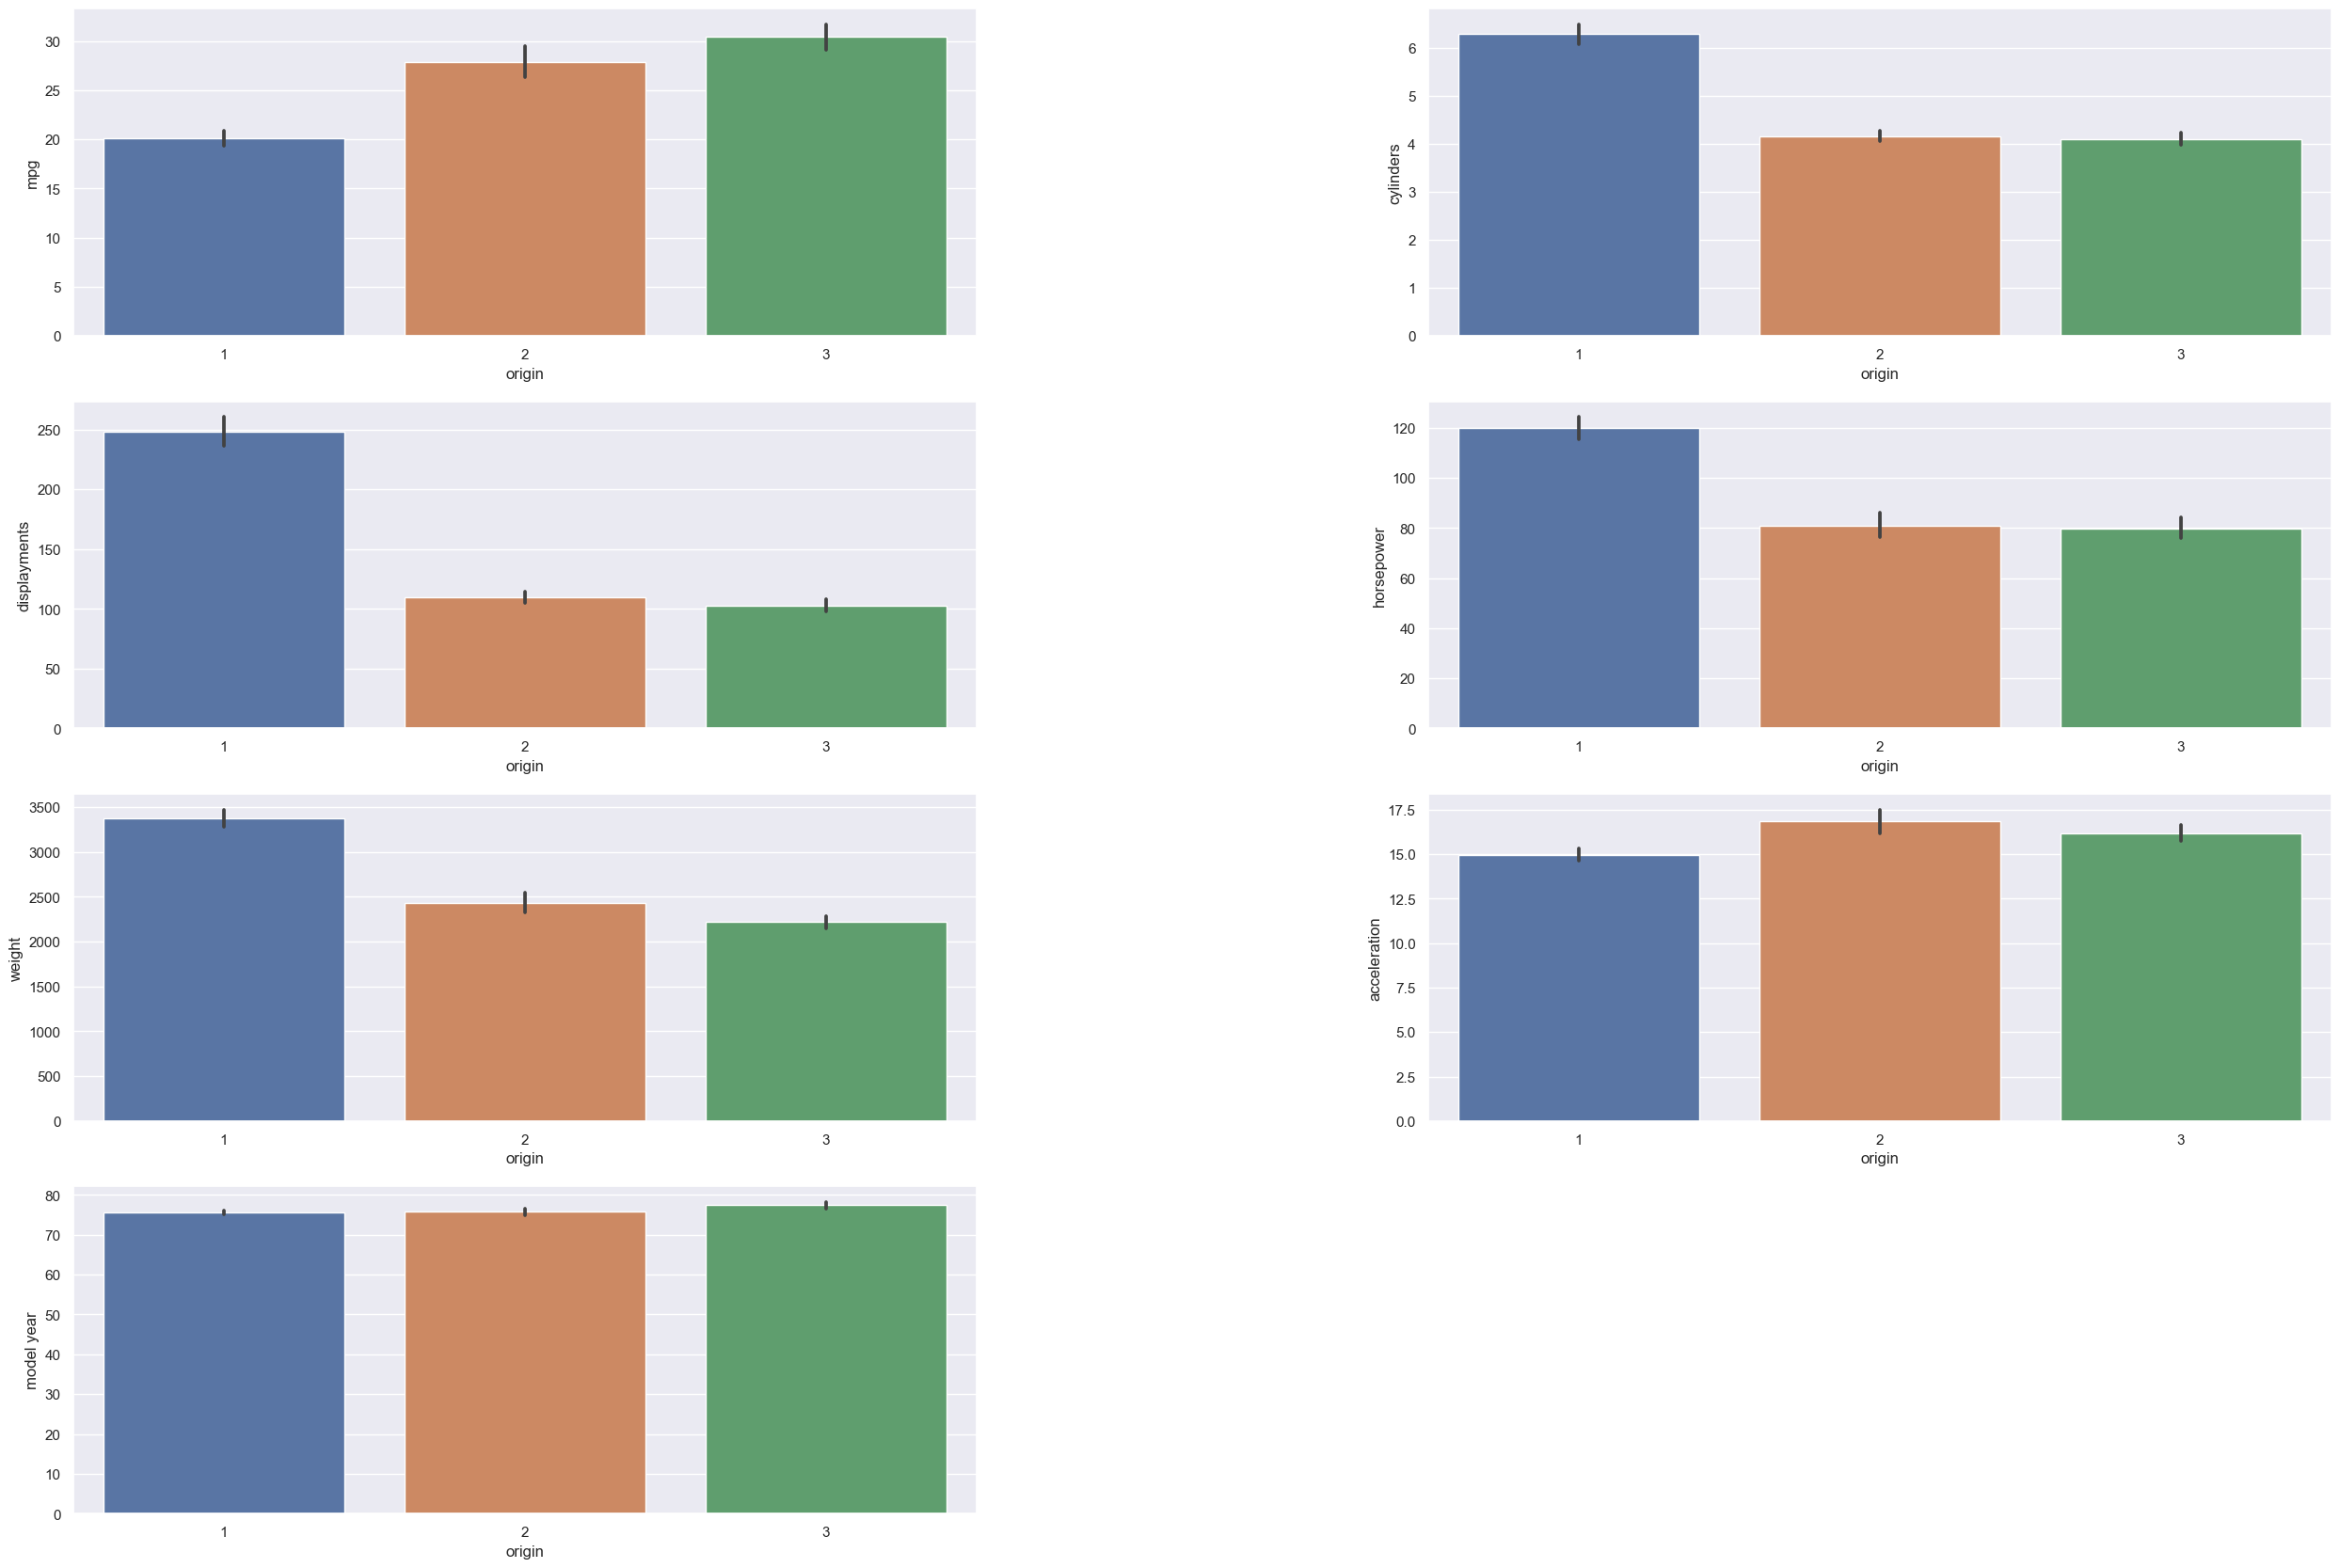

In [52]:
#Barplots based on origin
inspectKeys = ['mpg', 'cylinders', 'displayments', 'horsepower', 'weight', 'acceleration', 'model year']

fig, axes = plt.subplots(nrows=4,ncols=2)

for (index, fieldName) in enumerate(inspectKeys):
    row = index // 2
    col = index % 2
    axis = axes[row,col]
#sns.histplot(df[fieldName], ax=axis)
    sns.barplot(y=fieldName, x='origin', data=df, ax=axis)
fig.delaxes(axes[3][1])
fig.subplots_adjust(left=0, bottom=0, right=2, top=2, wspace=0.5, hspace=0.2)
plt.show()

## Relationships between numeric features and other numeric features

In [53]:
corelation = df.corr()
corelation

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.951787,0.844158,0.895220,-0.522452,-0.360762
displayments,-0.804203,0.951787,1.000000,0.898326,0.932475,-0.557984,-0.381714
horsepower,-0.778427,0.844158,0.898326,1.000000,0.866586,-0.697124,-0.424419
weight,-0.831741,0.895220,0.932475,0.866586,1.000000,-0.430086,-0.315389
acceleration,0.420289,-0.522452,-0.557984,-0.697124,-0.430086,1.000000,0.301992
model year,0.579267,-0.360762,-0.381714,-0.424419,-0.315389,0.301992,1.000000


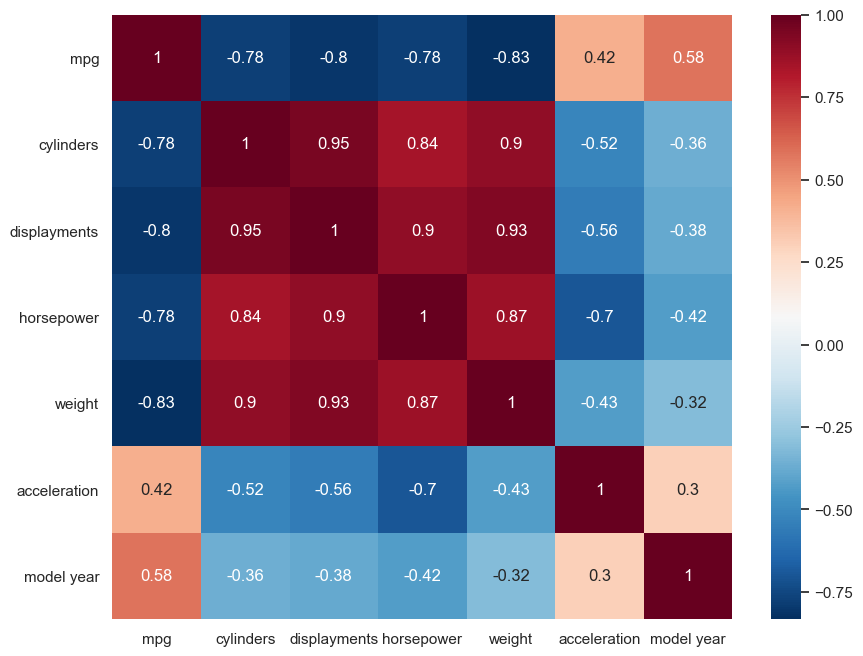

In [55]:
# Correlation map of the data
plt.figure(figsize=(10,8))
sns.heatmap(corelation, cmap='RdBu_r', annot=True)
plt.show()
# Significant correlations between many attributes. mpg shows strong negative ones with cylinders,
# ,displayment ,horsepower and weight.

### Multivariable 

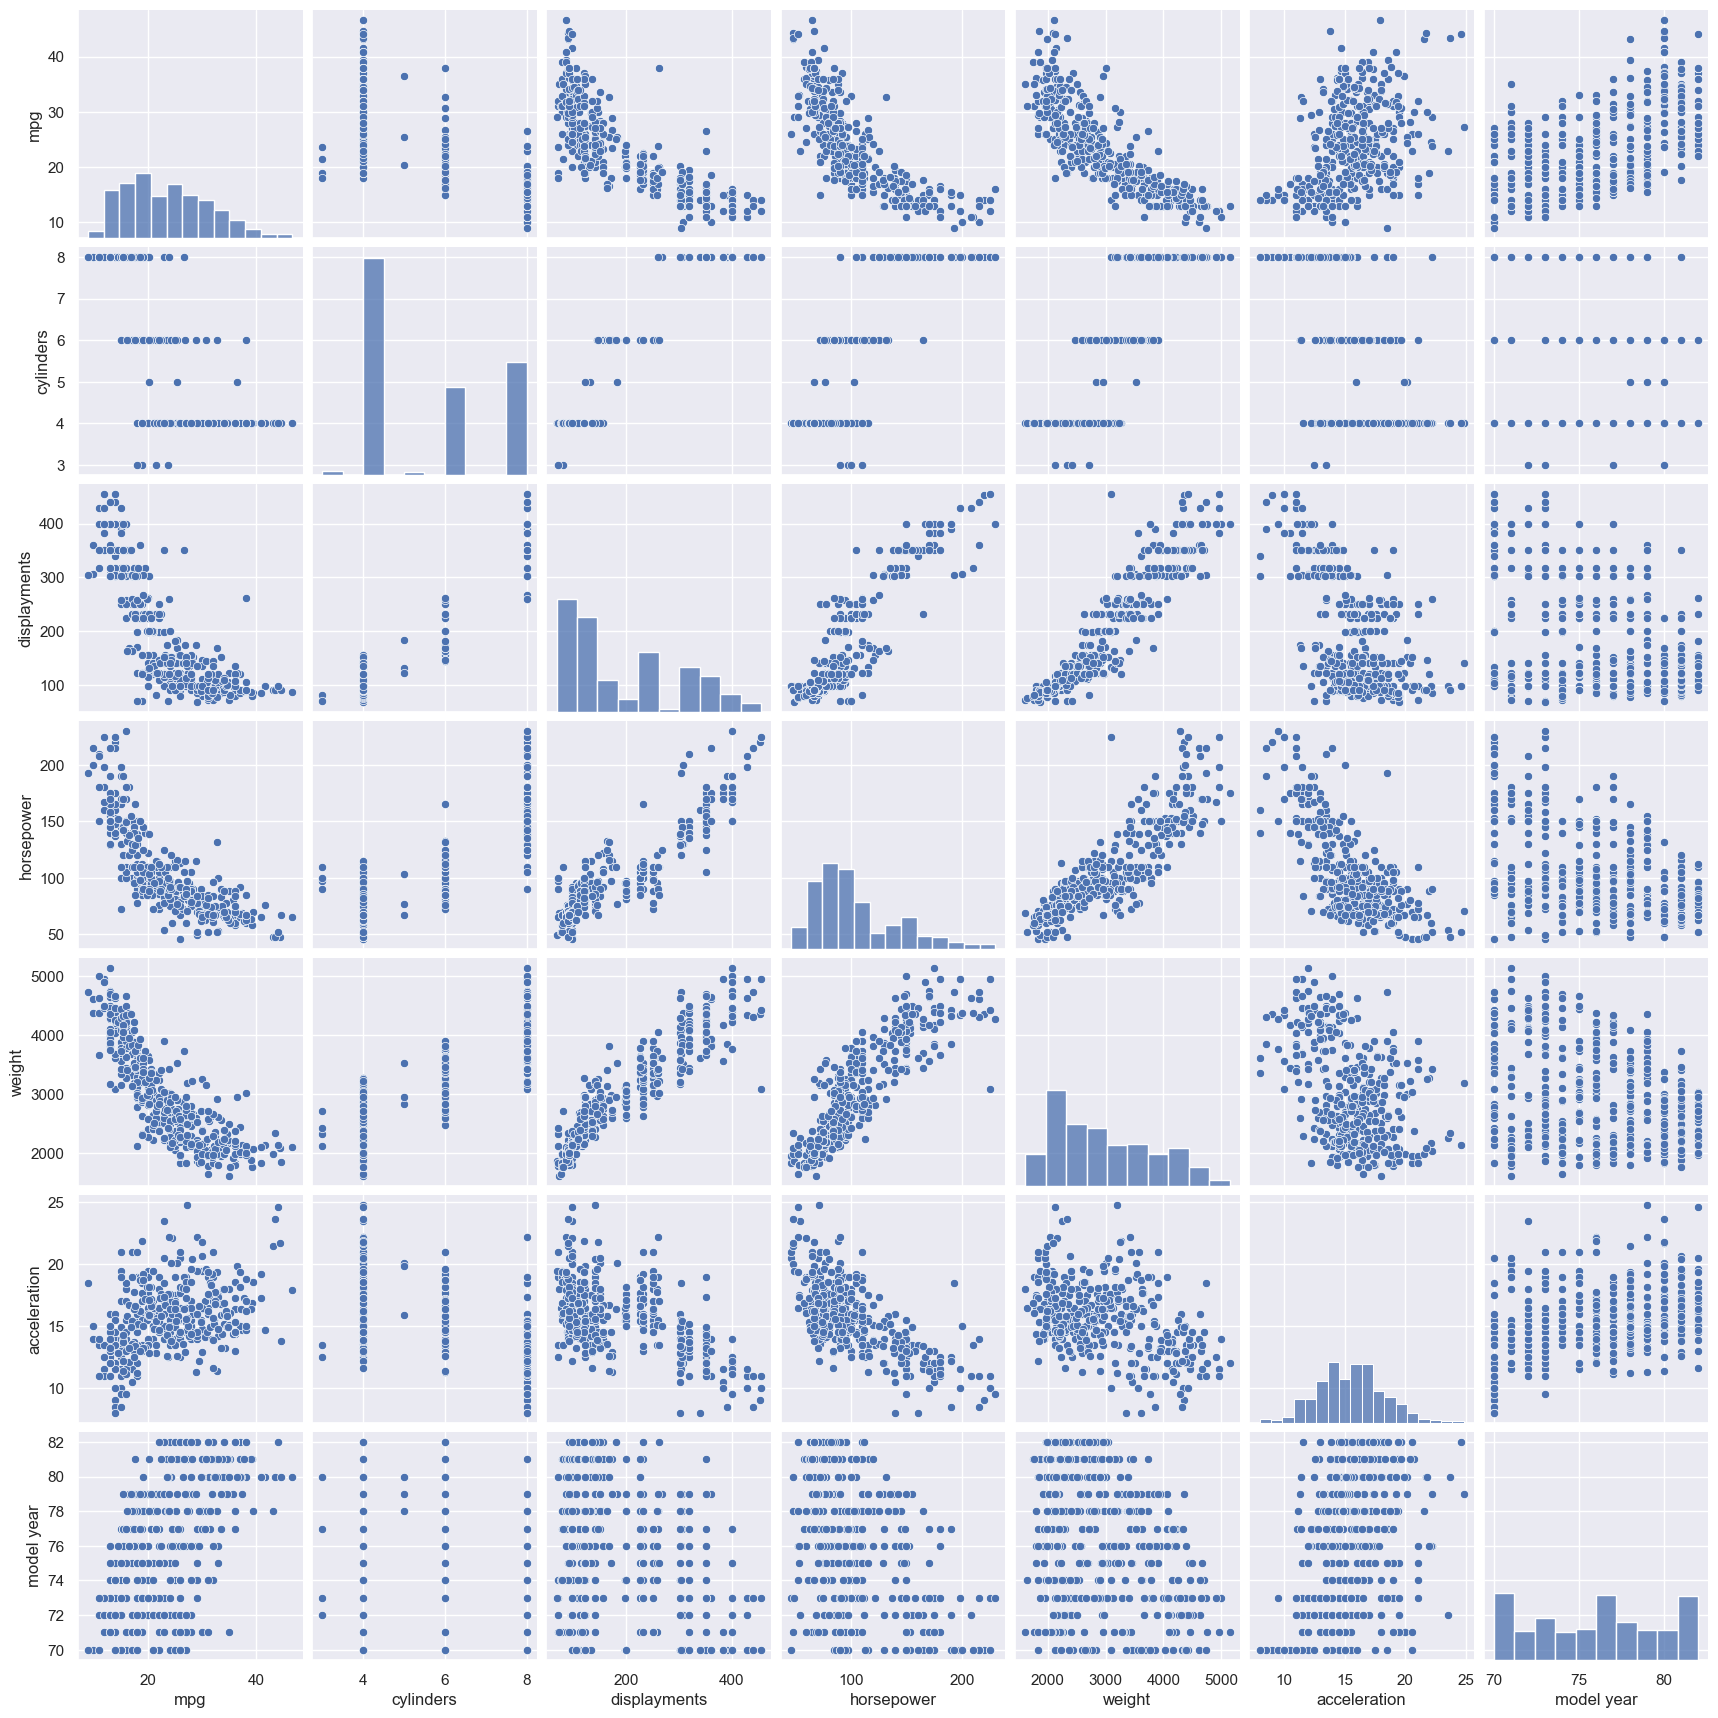

In [58]:
sns.pairplot(df)
plt.show()
# overview of all (X,Y) scatters

c:\users\ezet\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='horsepower', ylabel='displayments'>

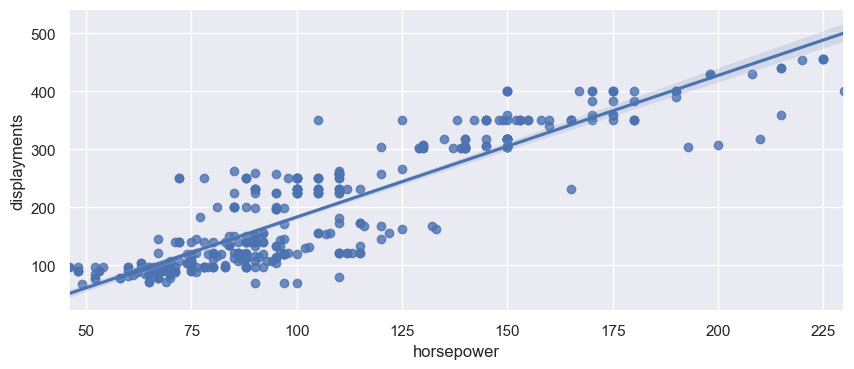

In [59]:
plt.figure(figsize=(10, 4))
sns.regplot('horsepower', 'displayments', data=df)
# Illustration of linear regression between displayments and horsepower


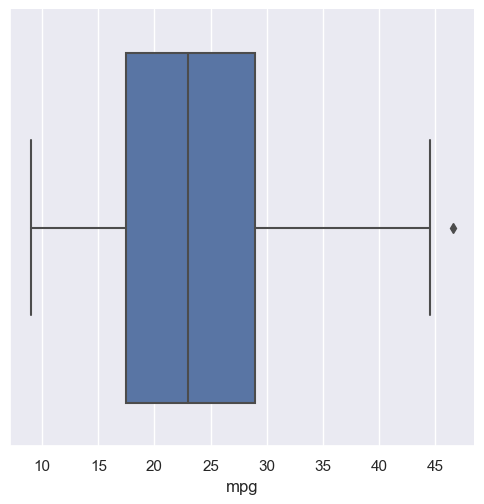

In [60]:
#Cat plot for mpg 
sns.catplot(x='mpg', kind = 'box', data = df)

# Clusters Experiments

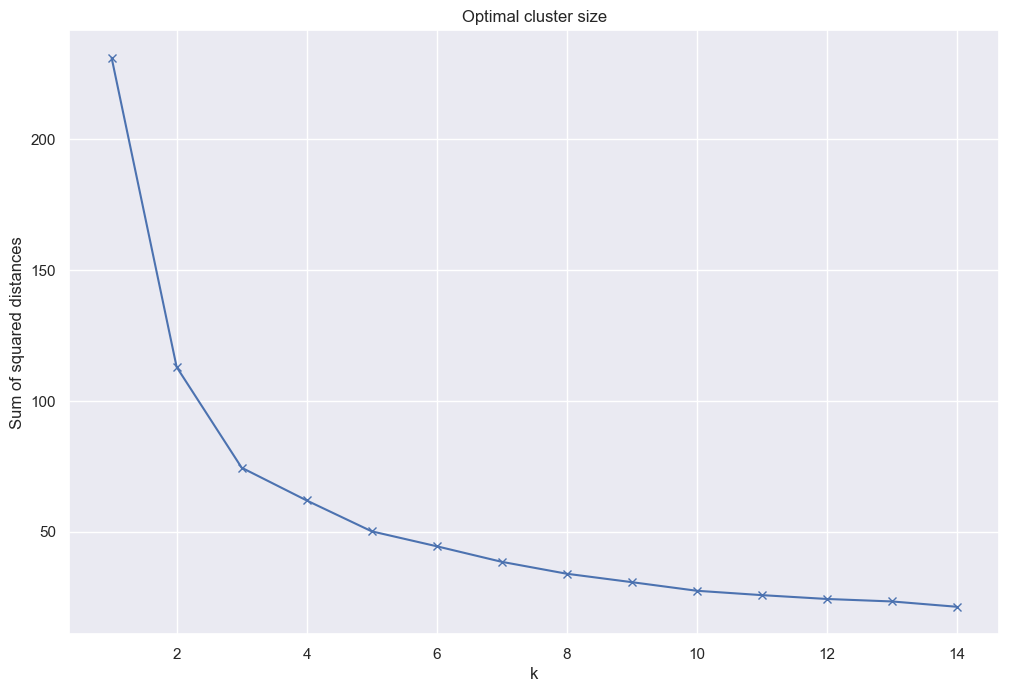

In [65]:
# Looking for clusters in our dataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# setting a seed
np.random.seed(0)

# Clusters based on the following
dfC = df[['cylinders','displayments','horsepower','weight','acceleration','model year','origin']]
#dropping NA values.
dfC = dfC.dropna()
# origins to numerical
dfC['origin'] = dfC['origin'].astype('int')
# scale
mms = MinMaxScaler()
mms.fit(dfC)
data_transformed = mms.transform(dfC)

# compute sum of squared distances and find optimal k
sum_of_squared_distances = []
clusterRange = range(1, 15)
for k in clusterRange:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    sum_of_squared_distances.append(km.inertia_)

# Visualization of the last one
plt.plot(clusterRange, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Optimal cluster size')
plt.show()

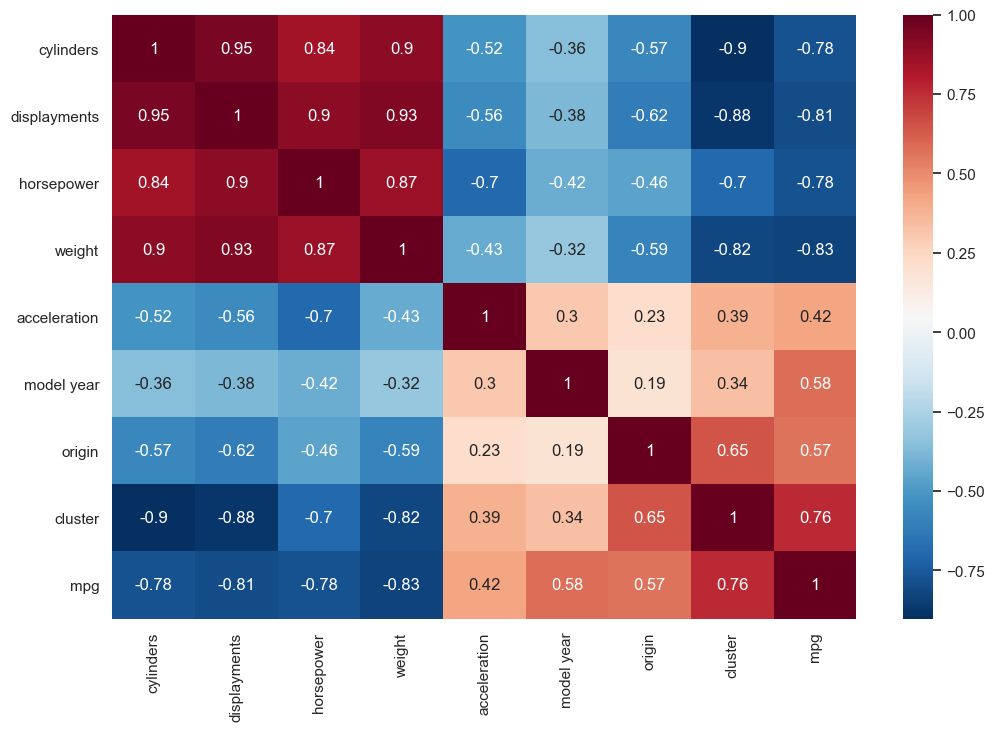

In [66]:
# Observation
# for 3 clusters the clusters tend to be the origins!!
# for 2 clusters the correlation is strong with mpg!!!

km = KMeans(n_clusters=2)
km = km.fit(data_transformed)

dfC['cluster'] = km.fit_predict(data_transformed)
dfC['mpg'] = df['mpg'].dropna()
plt.figure()
sns.heatmap(dfC.corr(), cmap='RdBu_r', annot=True)
plt.show()

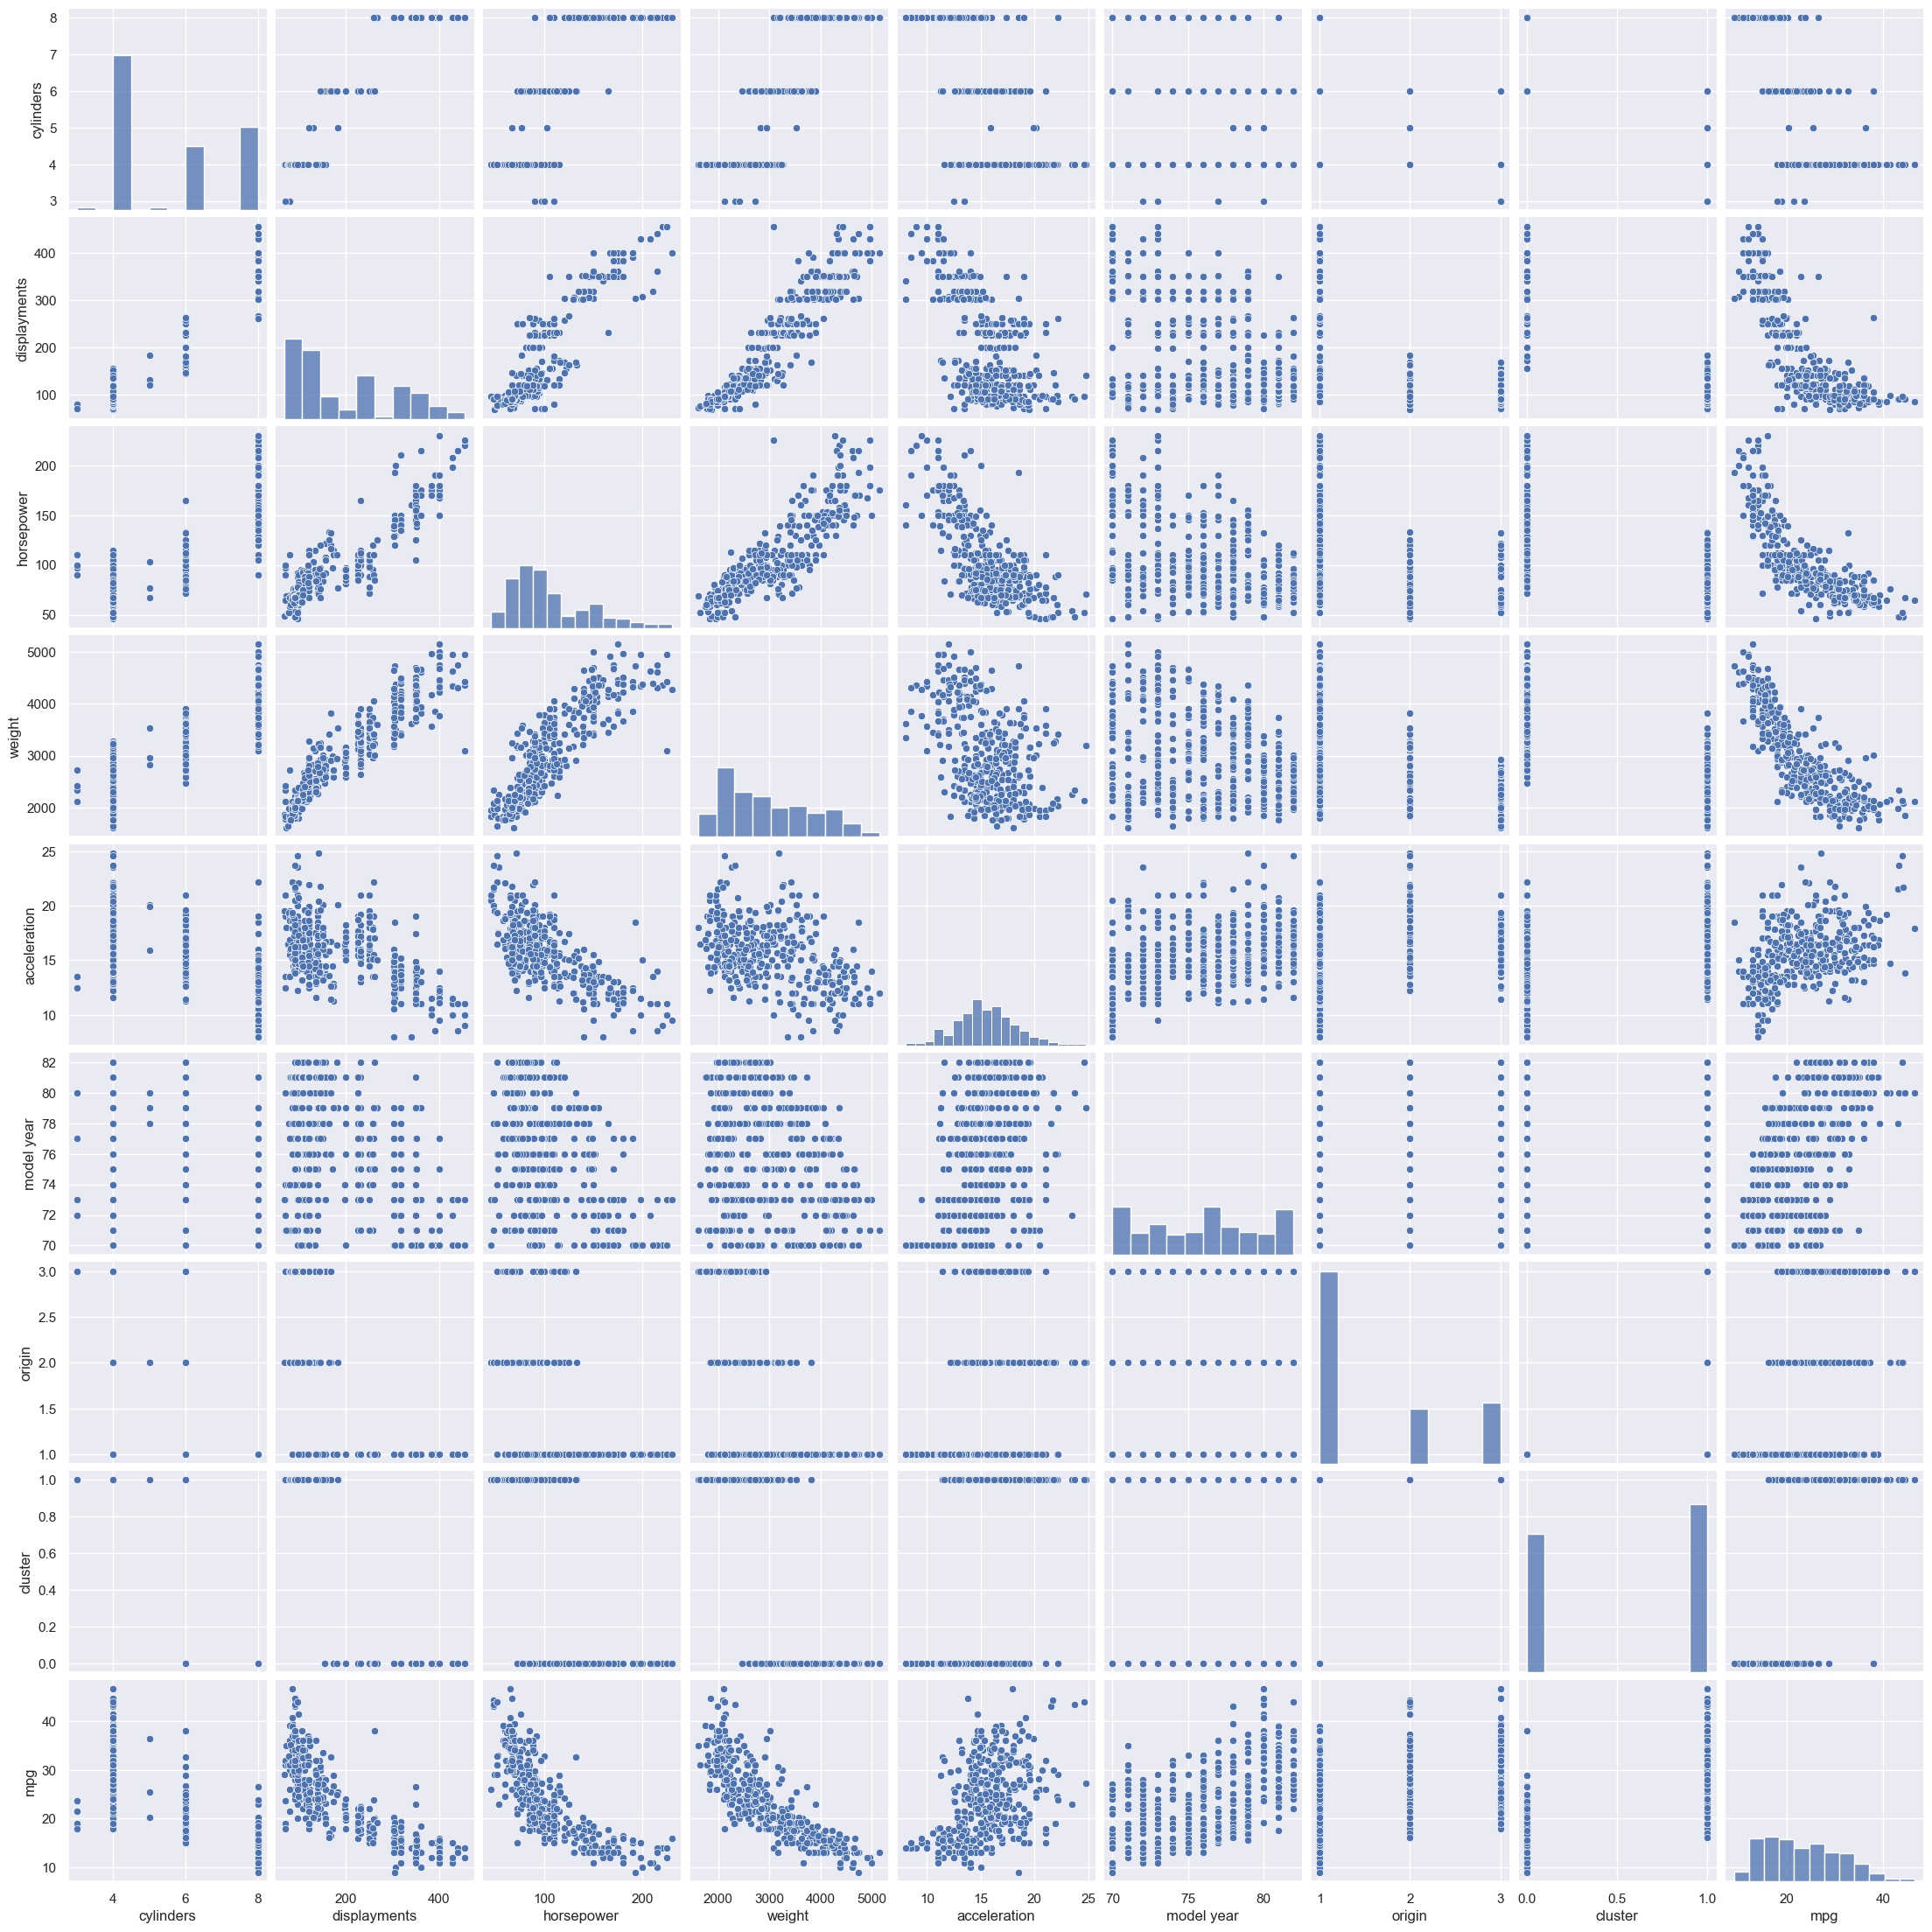

In [67]:
sns.pairplot(dfC)
plt.show()

2


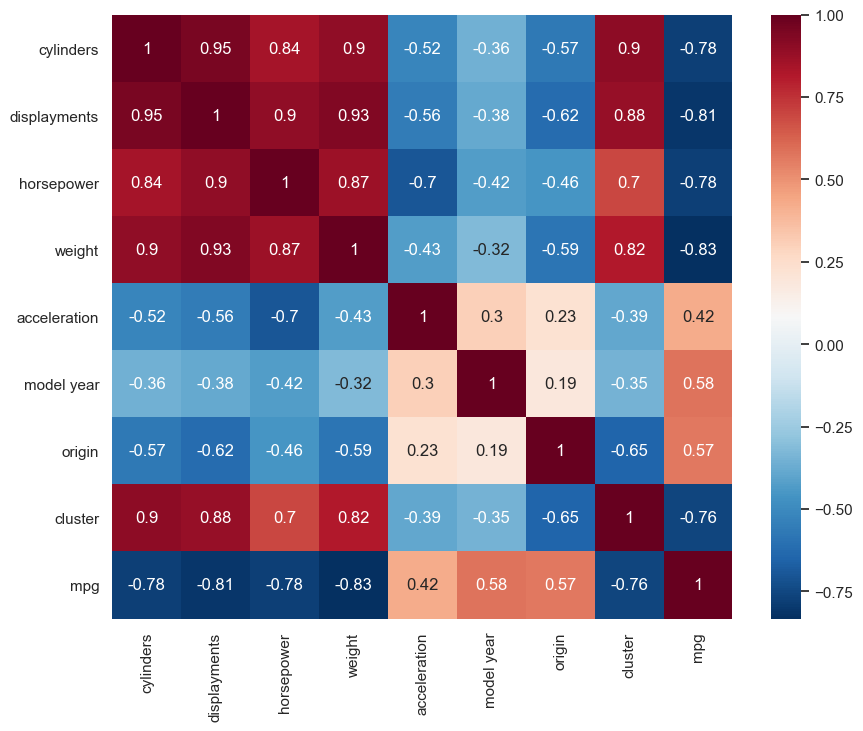

In [70]:
# MeanShift Cluster exploration
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html
# οptimal cluster size = 2
from sklearn.cluster import MeanShift

cluster = MeanShift()
cluster = cluster.fit(data_transformed)

n_clusters_ = len(cluster.cluster_centers_)
print(n_clusters_)

dfC['origin'] = dfC['origin'].astype('int')
dfC['cluster'] = cluster.fit_predict(data_transformed)
plt.figure(figsize=(10,8))
sns.heatmap(dfC.corr(), cmap='RdBu_r', annot=True)
plt.show()

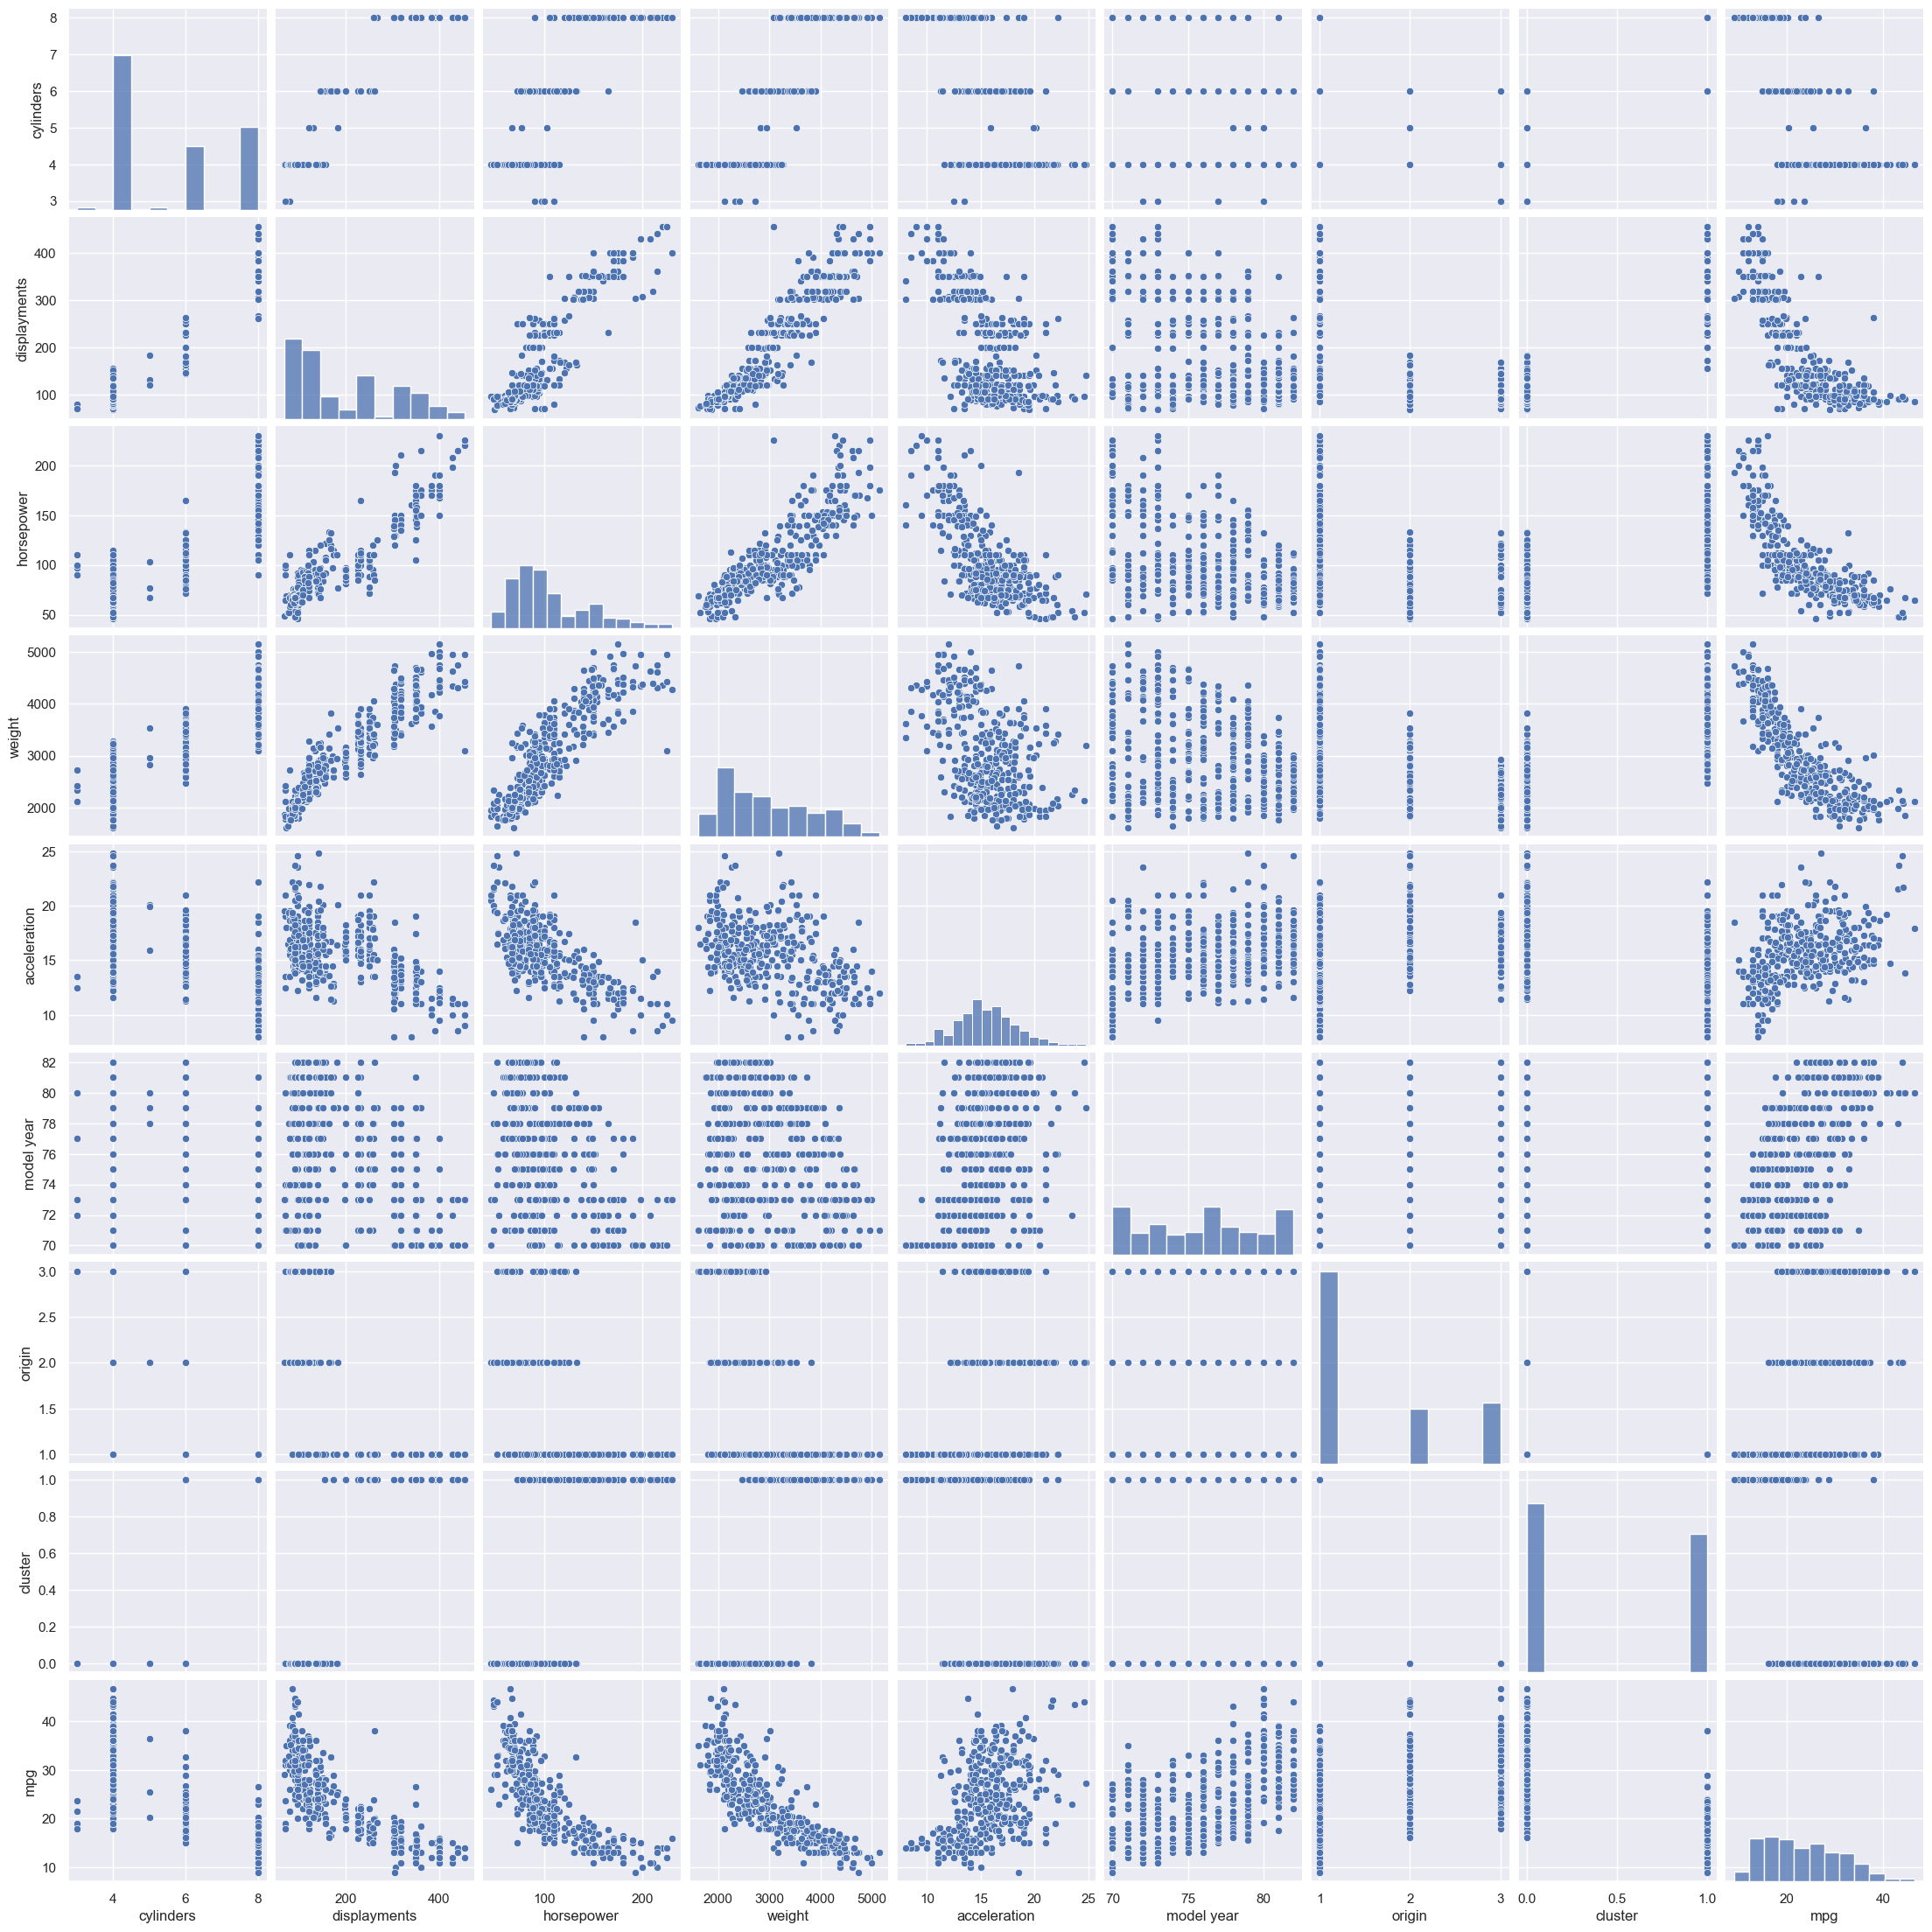

In [69]:
sns.pairplot(dfC)
plt.show()

<AxesSubplot:xlabel='cluster', ylabel='mpg'>

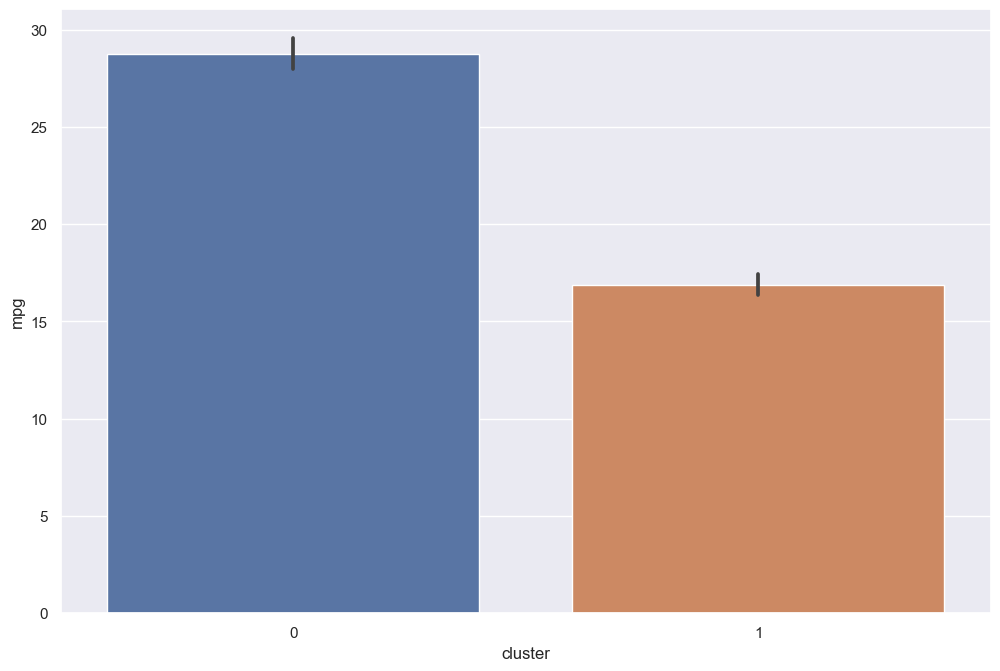

In [71]:
sns.barplot(y='mpg', x='cluster',  data=dfC)

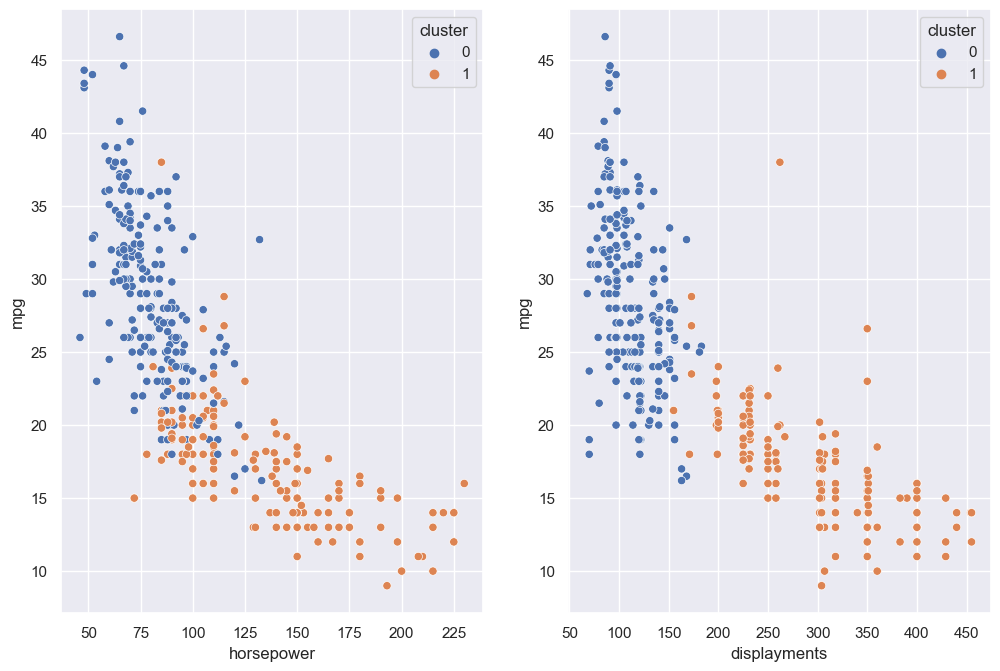

In [72]:
fig, axes = plt.subplots(1,2)

sns.scatterplot(ax=axes[0], x='horsepower', y= 'mpg', hue = 'cluster', data=dfC)
sns.scatterplot(ax=axes[1], x='displayments', y= 'mpg', hue = 'cluster', data=dfC)
    
plt.show()

## Extracting words out of column: car name

In [74]:
# extract car brands from car name
def getBrand(x):
    brand = x.lower().split()[0]
    return brand
df['brand'] = df['car name'].map(getBrand)

In [75]:
df

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,origin,car name,brand
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,ford
...,...,...,...,...,...,...,...,...,...,...
401,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl,ford
402,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup,vw
403,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage,dodge
404,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger,ford


In [76]:
# create bag of words for brands
bagOfWords = {}
for name in df['brand']:
    words = name.lower().replace('(', '').replace(')', '').split()
    for word in words:
        if word not in bagOfWords:
            bagOfWords[word] = 0
        bagOfWords[word] += 1

In [77]:
# used to find typos
matchStrictness = 0.7
foundWords = []
for word in bagOfWords:
    for altWord in bagOfWords:
        if word in foundWords or altWord in foundWords:
            continue
        if word.isdigit() or altWord.isdigit():
            continue
        if word == altWord:
            continue
        similarity = SequenceMatcher(None, word, altWord)
        if similarity.ratio() > matchStrictness:
            foundWords.append(word)
            foundWords.append(altWord)
            print(f'{word} - {altWord}')

chevrolet - chevroelt
toyota - toyouta
volkswagen - vokswagen
mazda - maxda
mercedes-benz - mercedes


In [80]:
# Also manually since we have few values. We can also see dimunitives of brands
df['brand'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'citroen', 'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot',
       'audi', 'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

In [81]:
# διόρθωση της brand name column
def getBrand(x):
    brand = x.lower().split()[0]
    if (brand == 'vw' or brand == 'vokswagen'):
        return 'volkswagen'
    if (brand == 'toyouta'):
        return 'toyota'
    if (brand == 'maxda'):
        return 'mazda'
    if (brand == 'chevroelt' or brand =='chevy'):
        return 'chevrolet'
    if (brand == 'mercedes-benz'):
        return 'mercedes'
    return brand
df['brand'] = df['car name'].map(getBrand)

In [85]:
#Significant words after brand names
carTokens = ['sw', 'custom', 'brougham', 'diesel', 'turbo', 'classic', 'dl', 'coupe', 'deluxe', 'sport', 'pickup', 'auto', 'man', '2+2']

for token in carTokens:
    def tokenExistsInName(x):
        name = x.lower()
        return token in name
    df[token] = df['car name'].map(tokenExistsInName)

In [86]:
df

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,origin,car name,brand,...,turbo,classic,dl,coupe,deluxe,sport,pickup,auto,man,2+2
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet,...,False,False,False,False,False,False,False,False,False,False
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,buick,...,False,False,False,False,False,False,False,False,False,False
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,plymouth,...,False,False,False,False,False,False,False,False,False,False
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,amc,...,False,False,False,False,False,False,False,False,False,False
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,ford,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl,ford,...,False,False,False,False,False,False,False,False,False,False
402,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup,volkswagen,...,False,False,False,False,False,False,True,False,False,False
403,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage,dodge,...,False,False,False,False,False,False,False,False,False,False
404,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger,ford,...,False,False,False,False,False,False,False,False,False,False


In [88]:
df['brand'].value_counts()
# Analyzing the brands. This hi also not a brand. In case I am using this colum more I will get back to it.

ford          53
chevrolet     48
plymouth      32
amc           29
dodge         28
toyota        26
datsun        23
volkswagen    23
buick         17
pontiac       16
honda         13
mazda         12
mercury       11
oldsmobile    10
fiat           8
peugeot        8
audi           7
volvo          6
chrysler       6
saab           5
renault        5
opel           4
subaru         4
mercedes       3
bmw            2
cadillac       2
triumph        1
nissan         1
hi             1
capri          1
citroen        1
Name: brand, dtype: int64

In [89]:
# More than 20 cars brands
df1 = df.groupby("brand").filter(lambda x: len(x) > 20)
df1

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,origin,car name,brand,...,turbo,classic,dl,coupe,deluxe,sport,pickup,auto,man,2+2
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet,...,False,False,False,False,False,False,False,False,False,False
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,plymouth,...,False,False,False,False,False,False,False,False,False,False
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,amc,...,False,False,False,False,False,False,False,False,False,False
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,ford,...,False,False,False,False,False,False,False,False,False,False
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500,ford,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl,ford,...,False,False,False,False,False,False,False,False,False,False
402,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup,volkswagen,...,False,False,False,False,False,False,True,False,False,False
403,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage,dodge,...,False,False,False,False,False,False,False,False,False,False
404,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger,ford,...,False,False,False,False,False,False,False,False,False,False


In [90]:
# On the following function we set as input brand and get as output a barplot of mpg of this brand 
#  versus the other brands. Caution:output returns values only for cylinders this brand has. 

def brand_mpg(brand):

    our_brand = df1[df1['brand'] == brand]
    other_brands = df1.loc[df['cylinders'].isin(our_brand['cylinders'])]
    other_brands = other_brands[other_brands['brand'] != brand]
    other_brands['brand'] = 'other'
    result = our_brand.append(other_brands, sort=False)
    
    
    return sns.barplot(y='mpg', x='cylinders',hue = 'brand', data=result)


In [91]:
df1['brand'].unique()

array(['chevrolet', 'plymouth', 'amc', 'ford', 'dodge', 'toyota',
       'datsun', 'volkswagen'], dtype=object)

Please choose one of the upper brands: chevrolet


<AxesSubplot:xlabel='cylinders', ylabel='mpg'>

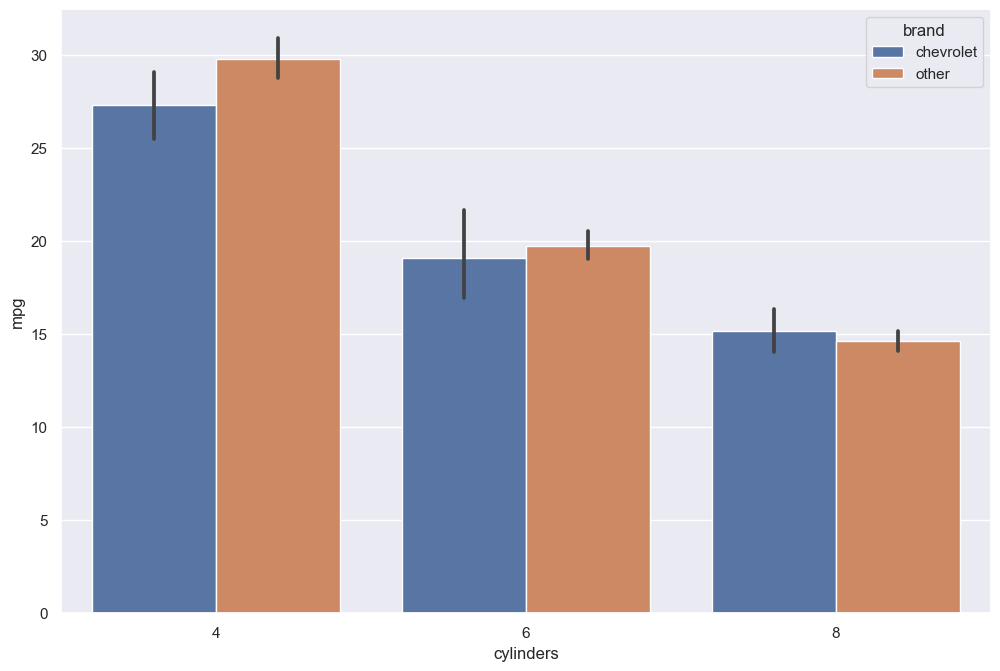

In [92]:
enough_sample = df1['brand'].unique()
X = input('Please choose one of the upper brands: ')
while X not in enough_sample:
    X = input('Wrong input. Please choose one of the upper brands: ')

brand_mpg(X)

We do not see any significant difference between a brand and the other brands.

In [94]:
df.describe(include='bool')
#48 appearences for sw and 18 for custom. 

,sw,custom,brougham,diesel,turbo,classic,dl,coupe,deluxe,sport,pickup,auto,man,2+2
count,406,406,406,406,406,406,406,406,406,406,406,406,406,406
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,358,388,396,399,404,400,400,401,401,403,405,404,402,404


In [95]:
pd.pivot_table(df, index='sw', columns='cylinders', values='mpg')

cylinders,3,4,5,6,8
sw,,,,,
False,20.55,29.591573,27.366667,20.009639,15.047126
True,NaN,27.200000,NaN,18.000000,14.506250


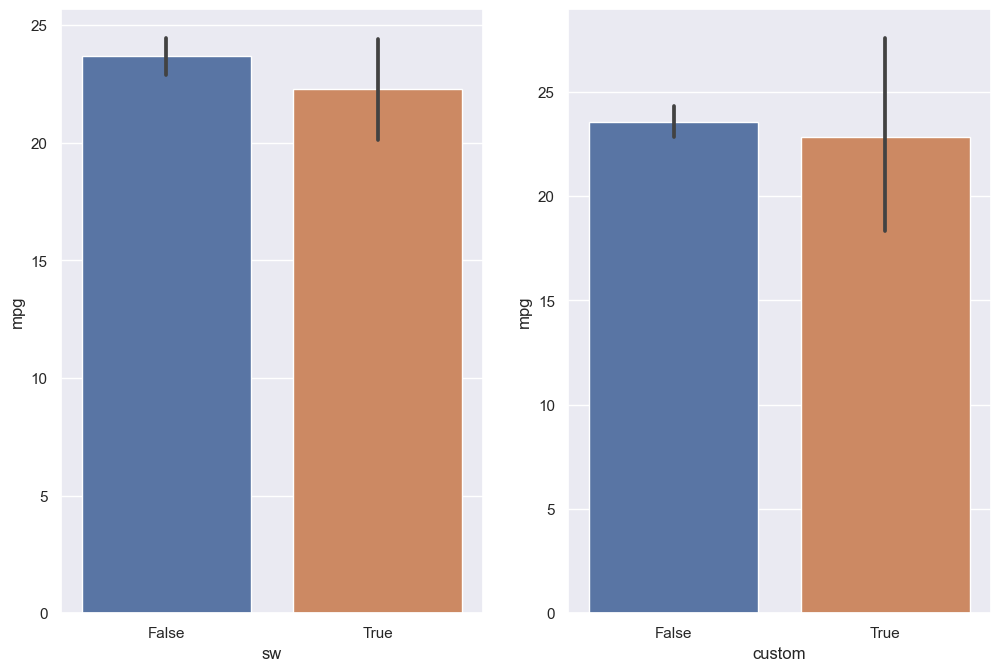

In [98]:
fig, axes = plt.subplots(1,2)

sns.barplot(ax=axes[0],y='mpg', x='sw', data=df)
sns.barplot(ax=axes[1],y='mpg', x='custom', data=df)
    
plt.show()

The only two words in plenty were sw and custom. In order to see their significance on the mpg we compute an mpg on the presence of the word and on the absence. Since the two occasions are similar, that means that sw and custom are probably not having a key role on mpg's value.

## Outliers Exploration

Από τα διαγράμματα δεν είδαμε κάποια πολύ περίεργη τιμή ή κάτι να ξεφεύγει σε σχέση με τα υπόλοιπα. Για επαλήθευση χρησιμοποιούμε σύγκριση αποστάσεων με βάση την τυπική απόκλιση και βρίσκουμε όντως μόνο 4 τιμές για το horsepower και 2 για το accelaration, ενώ στις υπόλοιπες αριθμητικές παραμέτρους δεν έχουμε καμία τιμή.Based on the diagrams we did not see any outlier. As a verification we use the following function:

In [102]:
def outliers(column):
    factor = 3
    upper_lim = column.mean () + column.std () * factor
    lower_lim = column.mean () - column.std () * factor

    df1 = df[(column > upper_lim) | (column < lower_lim)]
    return df1
# The following for is used in order to get the total of outliers on every numerical column

for column in df.select_dtypes(include=None, exclude=(object, bool)).columns:
    

    print(column,len(outliers(df[column])))
#Very few outliers

mpg 0
cylinders 0
displayments 0
horsepower 4
weight 0
acceleration 2
model year 0
